In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train = pd.read_csv('data/train.csv', sep = ',')
train.set_index('PassengerId',inplace=True,drop=True)

In [2]:
from sklearn.cross_validation import cross_val_score
# from statistics import mean
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y)
    return np.mean(xval)

/home/fabier/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]

In [4]:
def plot_hist(feature, bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    # print(x1)
    plt.hist([x1, x2], label=['Victime','Survivant'], bins=bins)#, color = ['', 'b'])
    plt.legend(loc = 'upper left')
    plt.title('Distribution relative de %s' %feature)
    plt.show()

In [5]:
def parse_model_2(X):
    target = X.Survived
    to_dummy = ['Pclass', 'Sex']
    for dum in to_dummy:
        split_temp = pd.get_dummies(X[dum], prefix = 'split_'+dum)
        for col in split_temp:
            X[col] = split_temp[col]
        del X[dum]
    X['Age'] = X.Age.fillna(X.Age.median())
    # X['is_child'] = X.Age <= 8
    # X['is_adult'] = train.Age.fillna(train.Age.median()) >= 18
    # X['is_under35'] = train.Age.fillna(train.Age.median()) <= 35
    # X['is_between_18and35'] = np.where((train.Age > 18) & (train.Age < 35), True, False)
    to_del = ['Name','Age','Cabin','Embarked','Survived','Ticket']
    for col in to_del: del X[col]
    return X, target

In [9]:
from sklearn.ensemble import RandomForestClassifier
X, y = parse_model_2(train.copy())
rf = RandomForestClassifier()
compute_score(rf, X, y)

0.80920314253647596

In [35]:
def clf_importance(X, clf):
    import pylab as pl
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    pl.title("Feature importances")
    for tree in clf.estimators_:
        pl.plot(range(X.shape[1]), tree.feature_importances_[indices])
    pl.plot(range(X.shape[1]), importances[indices], 'r')
    pl.show()
    for f in range(X.shape[1]):
        print("%d. feature : %s (%f)" % (f+1, X.columns[indices[f]], importances[indices[f]]))

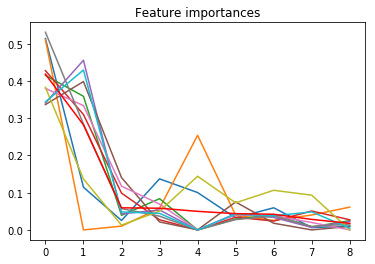

1. feature : Fare (0.418444)
2. feature : split_Sex_female (0.282264)
3. feature : split_Pclass_3 (0.059345)
4. feature : SibSp (0.058270)
5. feature : split_Sex_male (0.049895)
6. feature : is_child (0.043756)
7. feature : Parch (0.042086)
8. feature : split_Pclass_1 (0.028254)
9. feature : split_Pclass_2 (0.017685)


In [36]:
rf = RandomForestClassifier()
rf.fit(X, y)
clf_importance(X, rf)